<a href="https://colab.research.google.com/github/MuhammadRustamShomi/Gen4Gen-1/blob/dev-rustam/Gen4Gen_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import nltk
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import sklearn.metrics
from pandas import DataFrame,Series
from sklearn.feature_extraction.text import TfidfVectorizer
from time import time
import matplotlib.pyplot as plt
import os
os.chdir(os.getcwd())

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Gen4Gen - Gen4Gen.csv',sep=',')

In [4]:
df.head()

,Jobs,Description
0,Data Analysis & Reports,build automated and insightful power bi report
1,Greeting Cards & Videos,get kermit to personalize a video birthday gre...
2,Website Builders & CMS,build or redesign your existing squarespace we...
3,Cooking Lessons,create original eastern food cooking video recipe
4,Legal Writing,write gdpr privacy policy and terms and condit...


In [5]:
print("The data-set has %d rows and %d columns"%(df.shape[0],df.shape[1]))

The data-set has 6183 rows and 2 columns


In [6]:
# Finding Missing Values (if any exists)
print(df.columns) 

for col_name in df.columns:
    print (col_name,end=": ")
    print (sum(df[col_name].isnull()))

Index(['Jobs', 'Description'], dtype='object')
Jobs: 0
Description: 0


In [7]:
df.describe(include='all')

,Jobs,Description
count,6183,6183
unique,129,6062
top,Book EditingNew,be your personal stylist
freq,48,5


In [8]:
df.loc[df.duplicated(subset="Description",keep='first')]

,Jobs,Description
347,Book EditingNew,be your professional book editor
576,Fitness Lessons,be your online personal trainer and nutritionist
1237,HR ConsultingNew,assist in human resource management tasks
1675,Book EditingNew,edit your fantasy novel
1749,Animation for Streamers,create custom animated twitch pack for your st...
...,...,...
6077,Personal StylistsNew,be your personal stylist
6083,Podcast EditingNew,professionally edit your podcast
6098,Unboxing VideosNew,unbox your product and try it in a video
6165,Business Names & Slogans,think of 5 original name ideas for your busine...


In [9]:
jobs_df2=df.drop_duplicates()

In [10]:
print(sum(jobs_df2.duplicated()))
jobs_df2.shape

0


(6071, 2)

In [11]:
category_counter={x:0 for x in set(jobs_df2['Jobs'])} 

In [12]:
for each_cat in jobs_df2['Jobs']:
    category_counter[each_cat]+=1

In [13]:
print(category_counter)   # list of distinct categories in whole dataset
ylab=[]
for val in category_counter.values():
    ylab.append(val)
xlab=[]
for key in category_counter.keys():
    xlab.append(key)

{'E-Commerce Marketing': 48, 'Branding Services': 48, 'Market Research': 48, 'Spiritual & Healing': 48, 'Scriptwriting': 48, 'Session Musicians': 48, 'Live Action Explainers': 48, 'E-Commerce ManagementNew': 48, 'Online Lessons': 48, 'Celebrity Impersonators': 48, 'Character Animation': 46, 'Cybersecurity & Data ProtectionNew': 39, 'Sound DesignNew': 48, 'Fitness Lessons': 46, 'Singers & Vocalists': 47, 'Project ManagementNew': 48, 'Game Development': 48, 'Flyer Distribution': 48, 'Jingles & Intros': 48, 'DJ Drops & Tags': 48, 'eLearning Video ProductionNew': 42, 'Virtual Assistant': 44, 'WordPress': 48, 'Web Traffic': 48, 'Research & Summaries': 48, 'SongwritersNew': 48, 'UX Writing': 47, 'App & Website Previews': 47, 'Sales Copy': 48, 'Subtitles & Captions': 48, 'Desktop Applications': 48, 'QA': 48, 'Resume Writing': 47, 'Financial ConsultingNew': 48, 'Animation for Kids': 45, 'Press Releases': 45, 'Case Studies': 48, 'Data Analysis & Reports': 48, 'Book & eBook Writing': 47, 'Relati

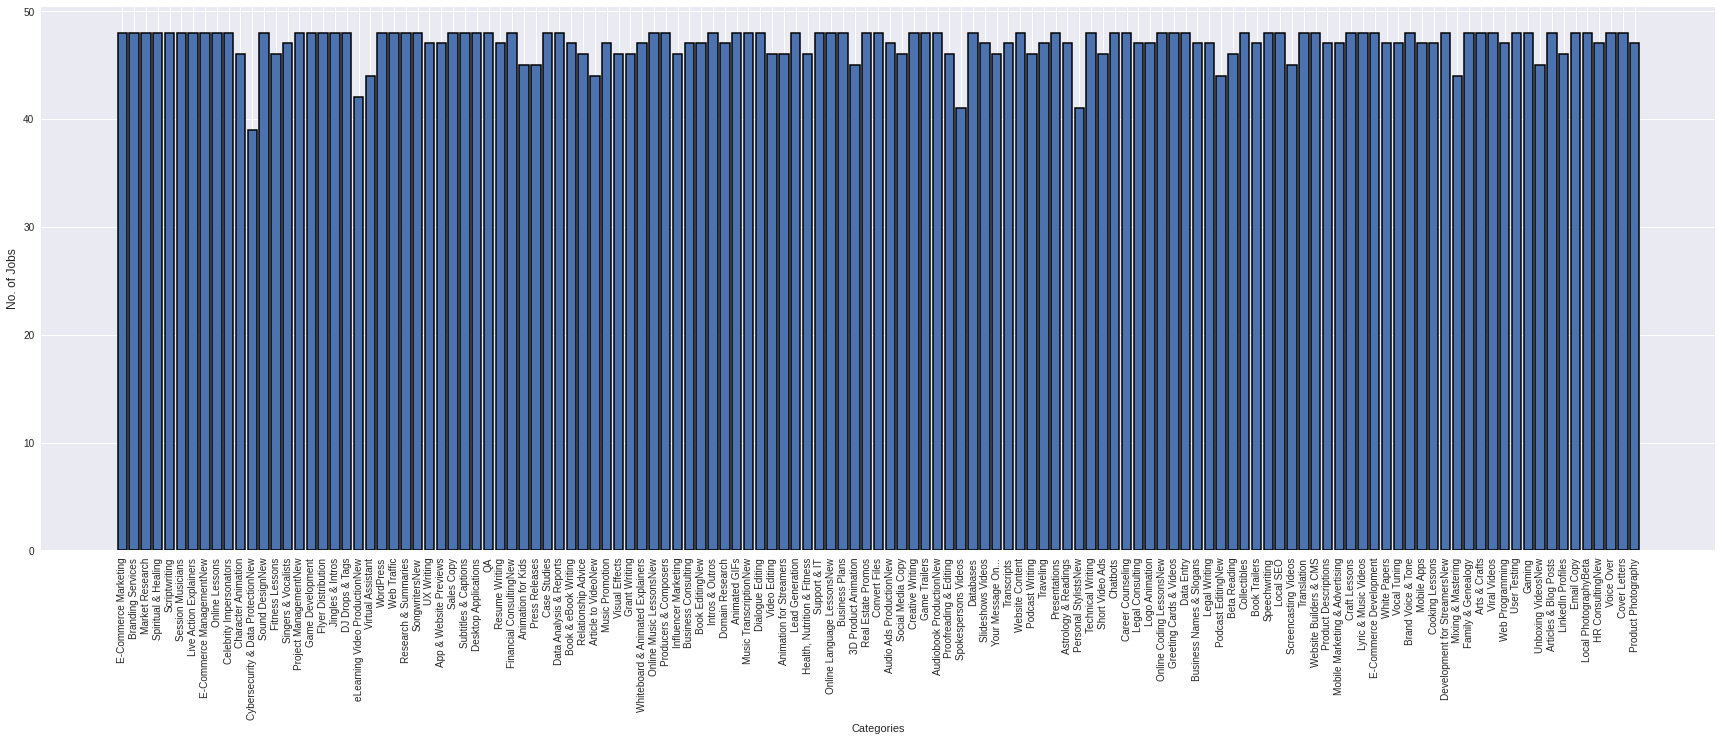

In [14]:
%matplotlib inline
plt.figure(figsize=(30,10))
plt.style.use("seaborn")
ypos=np.arange(len(xlab))
plt.xticks(ypos,xlab,rotation=90)
plt.xlabel('Categories')
plt.ylabel('No. of Jobs',fontsize=12)
plt.bar(ypos,ylab,edgecolor='black',linewidth=1.5)
plt.show()

In [15]:
corpus=jobs_df2.Description

In [16]:
all_words=[w.split() for w in corpus]

all_flat_words=[ewords for words in all_words for ewords in words]

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

all_flat_words_ns=[w for w in all_flat_words if w not in stopwords.words("english")]
#removing all the stop words from the corpus

set_nf=set(all_flat_words_ns)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
print("Number of unique vocabulary words in the Description column of the dataframe: %d"%len(set_nf))

Number of unique vocabulary words in the Description column of the dataframe: 5270


In [18]:
porter=nltk.PorterStemmer()
for each_row in jobs_df2.itertuples():
    m1=map(lambda x: x,(each_row[1]+' '+each_row[2]).lower().split())
    #for each row, it gets title and job description, concatenates them and converts them to lower case.
    m2=map(lambda x: porter.stem(x),m1)
    #Using Porter Stemmer in NLTK, stemming is performed on the str created in previous step.
    jobs_df2.loc[each_row[0],'query_desc']=' '.join(m2)
    #a derived column is created and the pre-processed string is stored in that column for each row.

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

In [19]:
#to confirm if we have successfully completed the transformation:
jobs_df2.head()
#it can be seen that a new column is created and filled with the stemmed words comprised of data concatenated from title and desc
#columns of the data frame. This newly created column will become our corpus for subsequent feature extraction process.

,Jobs,Description,query_desc
0,Data Analysis & Reports,build automated and insightful power bi report,data analysi & report build autom and insight ...
1,Greeting Cards & Videos,get kermit to personalize a video birthday gre...,greet card & video get kermit to person a vide...
2,Website Builders & CMS,build or redesign your existing squarespace we...,websit builder & cm build or redesign your exi...
3,Cooking Lessons,create original eastern food cooking video recipe,cook lesson creat origin eastern food cook vid...
4,Legal Writing,write gdpr privacy policy and terms and condit...,legal write write gdpr privaci polici and term...


In [20]:
corpus=jobs_df2.query_desc
vectorizer = TfidfVectorizer(stop_words='english')
#Initializing TFIDF vectorizer to convert the raw corpus to a matrix of TFIDF features and also enabling the removal of stopwords.
tfidf_matrix=vectorizer.fit_transform(corpus).todense()
#creating TFIDF features sparse matrix by fitting it on the specified corpus. 
tfidf_names=vectorizer.get_feature_names()
#grabbing the name of the features.

In [21]:
print("Number of TFIDF Features: %d"%len(tfidf_names))

Number of TFIDF Features: 3805


In [22]:
training_time_container={'b_naive_bayes':0,'mn_naive_bayes':0,'random_forest':0,'linear_svm':0}
prediction_time_container={'b_naive_bayes':0,'mn_naive_bayes':0,'random_forest':0,'linear_svm':0}
accuracy_container={'b_naive_bayes':0,'mn_naive_bayes':0,'random_forest':0,'linear_svm':0}

In [23]:
variables=tfidf_matrix
#considering the TFIDF features as independent variables to be input to the classifier.
labels=jobs_df2.Jobs
#considering the category values as the class labels for the classifier.

variables_train,variables_test,labels_train,labels_test=train_test_split(variables,labels,test_size=.1)
#splitting the data into random training and test sets for both independent variables and labels.

In [24]:
#analyzing the shape of the training and test data-set:
print('Shape of Training Data: '+str(variables_train.shape))
print('Shape of Test Data: '+str(variables_test.shape))

Shape of Training Data: (5463, 3805)
Shape of Test Data: (608, 3805)


In [25]:

training_time_container.keys()

dict_keys(['b_naive_bayes', 'mn_naive_bayes', 'random_forest', 'linear_svm'])

In [26]:
from sklearn.naive_bayes import BernoulliNB
#loading Gaussian Naive Bayes from the sklearn library
bnb_classifier=BernoulliNB()
#initializing the object
t0=time()
bnb_classifier=bnb_classifier.fit(variables_train,labels_train)
training_time_container['b_naive_bayes']=time()-t0
#fitting the classifier or training the classifier on the training data

In [27]:
#after the model has been trained, we proceed to test its performance on the test data:
t0=time()
bnb_predictions=bnb_classifier.predict(variables_test)
prediction_time_container['b_naive_bayes']=time()-t0

In [28]:
prediction_time_container['b_naive_bayes']

0.0696570873260498

In [29]:
#the trained classifier has been used to make predictions on the test data-set. To evaluate the performance of the model,
#there are a number of metrics that can be used as follows:
nb_ascore=sklearn.metrics.accuracy_score(labels_test, bnb_predictions)
accuracy_container['b_naive_bayes']=nb_ascore

In [30]:
print("Bernoulli Naive Bayes Accuracy Score: %f"%accuracy_container['b_naive_bayes'])
print("Training Time: %f"%training_time_container['b_naive_bayes'])
print("Prediction Time: %f"%prediction_time_container['b_naive_bayes'])

Bernoulli Naive Bayes Accuracy Score: 0.810855
Training Time: 0.408360
Prediction Time: 0.069657


In [31]:
#it shows that the accuracy score of our model is 0.7237 or 72.37%. 
#Confusion Matrix is also another way to evaluate the prediction output of a classifier and also to determine the false positive
#and false negative, sensitivity, specificity, precision and recall metrics
print("Confusion Matrix of Bernoulli Naive Bayes Classifier output: ")
sklearn.metrics.confusion_matrix(labels_test,bnb_predictions)
#the values on the diagonal show correct predictions where as off-diagonal represent the records that have been misclassified.

Confusion Matrix of Bernoulli Naive Bayes Classifier output: 


array([[0, 1, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 4, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 5, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [32]:
from sklearn.naive_bayes import MultinomialNB
mn_bayes=MultinomialNB()
t0=time()
mn_bayes_fit=mn_bayes.fit(variables_train,labels_train)
training_time_container['mn_naive_bayes']=time()-t0
t0=time()
prediction_mn=mn_bayes_fit.predict(variables_test)
prediction_time_container['mn_naive_bayes']=time()-t0
mn_ascore=sklearn.metrics.accuracy_score(labels_test, prediction_mn) 
accuracy_container['mn_naive_bayes']=mn_ascore

In [33]:
print("Accuracy Score of Multi-Nomial Naive Bayes: %f" %(mn_ascore))
print("Training Time: %fs"%training_time_container['mn_naive_bayes'])
print("Prediction Time: %fs"%prediction_time_container['mn_naive_bayes'])

Accuracy Score of Multi-Nomial Naive Bayes: 0.975329
Training Time: 0.265487s
Prediction Time: 0.021734s


In [34]:
# Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier=RandomForestClassifier(n_estimators=50)
t0=time()
rf_classifier=rf_classifier.fit(variables_train,labels_train)

training_time_container['random_forest']=time()-t0
print("Training Time: %fs"%training_time_container['random_forest'])

t0=time()
rf_predictions=rf_classifier.predict(variables_test)
prediction_time_container['random_forest']=time()-t0
print("Prediction Time: %fs"%prediction_time_container['random_forest'])

accuracy_container['random_forest']=sklearn.metrics.accuracy_score(labels_test, rf_predictions)
print ("Accuracy Score of Random Forests Classifier: ")
print(accuracy_container['random_forest'])
print(sklearn.metrics.confusion_matrix(labels_test,rf_predictions))

Training Time: 7.304782s
Prediction Time: 0.049219s
Accuracy Score of Random Forests Classifier: 
0.9868421052631579
[[6 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 5 ... 0 0 0]
 ...
 [0 0 0 ... 7 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 1]]


In [36]:
# Linear SVM using Stochastic Gradient Descent

In [37]:
from sklearn import linear_model

svm_classifier=linear_model.SGDClassifier(loss='hinge',alpha=0.0001)

t0=time()
svm_classifier=svm_classifier.fit(variables_train, labels_train)
training_time_container['linear_svm']=time()-t0
print("Training Time: %fs"%training_time_container['linear_svm'])

t0=time()
svm_predictions=svm_classifier.predict(variables_test)
prediction_time_container['linear_svm']=time()-t0
print("Prediction Time: %fs"%prediction_time_container['linear_svm'])

accuracy_container['linear_svm']=sklearn.metrics.accuracy_score(labels_test, svm_predictions)
print ("Accuracy Score of Linear SVM Classifier: %f"%accuracy_container['linear_svm'])
print(sklearn.metrics.confusion_matrix(labels_test,svm_predictions))

Training Time: 33.245178s
Prediction Time: 0.022223s
Accuracy Score of Linear SVM Classifier: 0.988487
[[7 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 5 ... 0 0 0]
 ...
 [0 0 0 ... 7 0 0]
 [0 0 0 ... 0 6 0]
 [0 0 0 ... 0 0 1]]


In [38]:

#if we train the SGD Classifier with elastic net penalty, it  brings more sparsity to the model not possible with the L2:
svm_classifier_enet=linear_model.SGDClassifier(loss='hinge',alpha=0.0001,penalty='elasticnet')
svm_classifier_enet=svm_classifier_enet.fit(variables_train, labels_train)

In [39]:
svm_enet_predictions=svm_classifier_enet.predict(variables_test)

In [40]:
print ("Accuracy Score of Linear SVM Classifier: %f"%sklearn.metrics.accuracy_score(labels_test,svm_enet_predictions))

Accuracy Score of Linear SVM Classifier: 0.983553


In [41]:
%matplotlib inline
ytrainlab=[]
for val in training_time_container.values():
    ytrainlab.append(val)
xtrainlab=[]
for key in training_time_container.keys():
    xtrainlab.append(key)

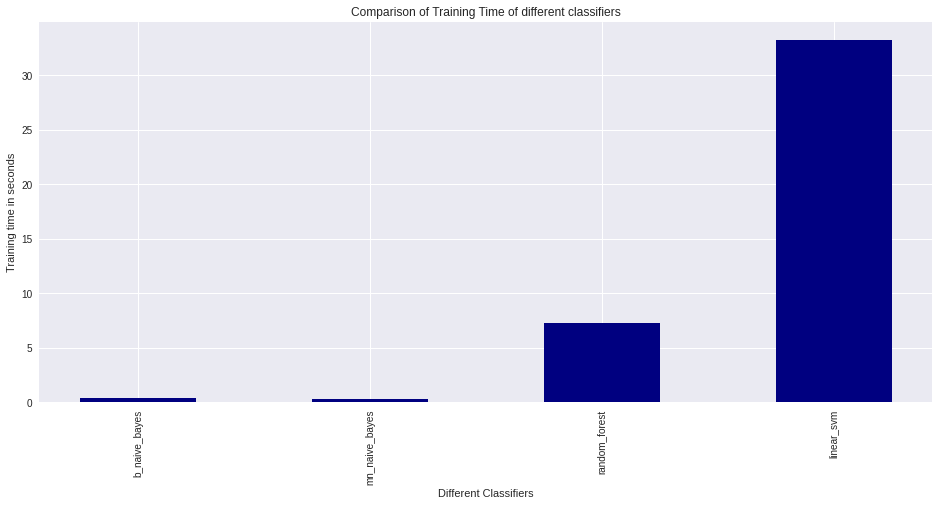

In [43]:
plt.figure(figsize=(16,7))
plt.style.use("seaborn")
ytrainpos=np.arange(len(xtrainlab))
plt.xticks(ytrainpos,xtrainlab,rotation=90)
plt.ylabel("Training time in seconds")
plt.xlabel("Different Classifiers")
plt.title("Comparison of Training Time of different classifiers")
plt.bar(ytrainpos,ytrainlab,width=0.5,color='navy')
plt.show()

In [44]:
ypredlab=[]
for val in prediction_time_container.values():
    ypredlab.append(val)
xpredlab=[]
for key in prediction_time_container.keys():
    xpredlab.append(key)

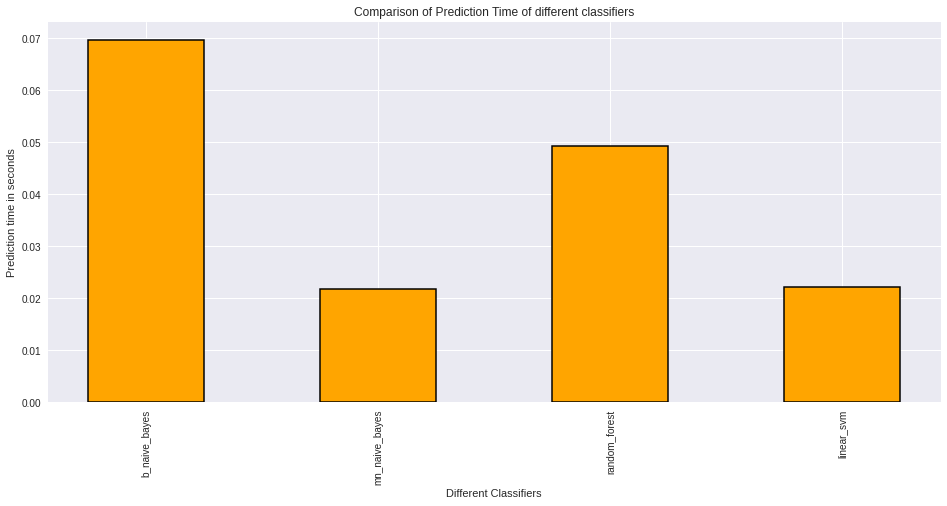

In [45]:
plt.figure(figsize=(16,7))
plt.style.use("seaborn")
ypredpos=np.arange(len(xpredlab))
plt.xticks(ypredpos,xpredlab,rotation=90)
plt.ylabel("Prediction time in seconds")
plt.title("Comparison of Prediction Time of different classifiers")
plt.bar(ypredpos,ypredlab,width=0.5,color="orange",edgecolor='black',linewidth=1.5)
plt.xlabel("Different Classifiers")
plt.show()

In [46]:
yacclab=[]
for val in accuracy_container.values():
    yacclab.append(val)
xacclab=[]
for key in accuracy_container.keys():
    xacclab.append(key)

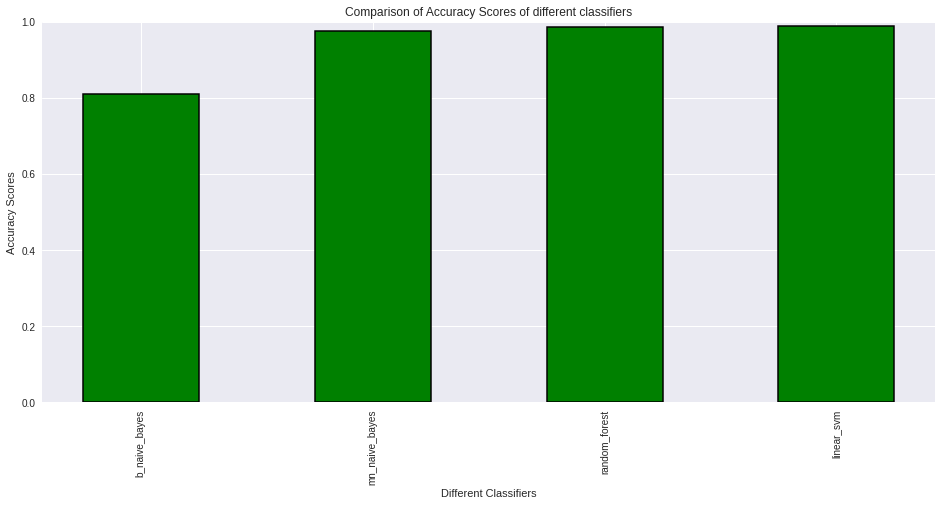

In [47]:
plt.figure(figsize=(16,7))
plt.style.use("seaborn")
yaccpos=np.arange(len(xacclab))
plt.xticks(yaccpos,xacclab,rotation=90)
plt.ylabel("Accuracy Scores")
plt.ylim(0,1.0)
plt.title("Comparison of Accuracy Scores of different classifiers")
plt.xlabel("Different Classifiers")
plt.bar(yaccpos,yacclab,width=0.5,color="green",edgecolor='black',linewidth=1.5)
plt.show()

In [48]:
# Applying Chi-Square Feature Selection
# currently we have used all the features from TFIDF matrix but we can reduce them using chi-square selection

In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_new=SelectKBest(chi2,k=3805).fit_transform(variables,labels)

In [51]:
#splititng the data into training and test data-set again:
cvariables_train,cvariables_test,clabels_train,clabels_test=train_test_split(X_new,labels,test_size=.2)

In [52]:
#now use these features to train the linear SVM Classifier and see what results do you get:
svm_classifier2=linear_model.SGDClassifier(alpha=0.0001,penalty='elasticnet',max_iter=50)
svm_classifier_f2=svm_classifier2.fit(cvariables_train, clabels_train)
predictions_svm2=svm_classifier_f2.predict(cvariables_test)

sklearn.metrics.confusion_matrix(clabels_test,predictions_svm2)

array([[10,  0,  0, ...,  0,  0,  0],
       [ 0, 11,  0, ...,  0,  0,  0],
       [ 0,  0, 12, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  6,  0,  0],
       [ 0,  0,  0, ...,  0,  7,  0],
       [ 0,  0,  0, ...,  0,  0,  4]])

In [53]:

sklearn.metrics.accuracy_score(clabels_test,predictions_svm2)

0.9876543209876543